In [80]:
import numpy as np
weights_list = []
bias_list = []
features = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,4,6,8,10,12,14,16,18,20])

rng = np.random.default_rng()

weight = rng.uniform(-1,1)
bias = rng.uniform(-1,1)

learning_rate = 0.025

epochs = 100
for epoch in range(epochs):
  for i,x in enumerate(features):
    y_prime = weight*features[i] + bias

    error = (y_prime-y[i])
    mse = error*error

    grad_w = 2*error*features[i] # gradients
    grad_b = 2*error

    weight = weight - learning_rate*grad_w
    bias = bias - learning_rate*grad_b

    if (epoch * len(features) + i) % 10 == 0: # Strictly for visualization purposes
      weights_list.append(weight)
      bias_list.append(bias)

print("y = ",weight,"x + ",bias)

y =  1.9988602120264316 x +  0.007918931824496255


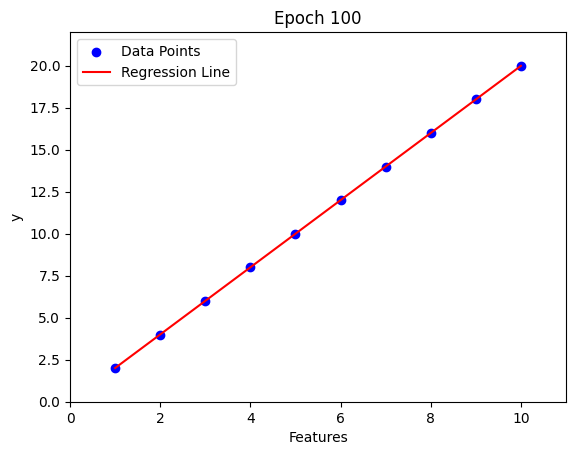

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Function to animate regression
def animate_regression(weights_list, bias_list, features, y):
    fig, ax = plt.subplots()
    ax.scatter(features, y, color='blue', label='Data Points')
    line, = ax.plot([], [], color='red', label='Regression Line')
    ax.set_xlim(0, max(features)+1)
    ax.set_ylim(0, max(y)+2)
    ax.legend()
    ax.set_xlabel("Features")
    ax.set_ylabel("y")

    def update(frame):
        w = weights_list[frame]
        b = bias_list[frame]
        y_line = w * features + b
        line.set_data(features, y_line)
        ax.set_title(f"Epoch {frame+1}")
        return line,

    ani = FuncAnimation(fig, update, frames=len(weights_list), interval=100)
    return HTML(ani.to_jshtml())  # For inline display in Colab

# Display animation
animate_regression(weights_list, bias_list, features, y)